# Overview

This week we'll talk about advanced network measures (beyond the degree distribution). We will use these tools to make sense of the Rapper network. 
This is the outline for today:

* Visualization and qualitative analysis of the Rapper Network
* Properties of the network structure, including how attributes and other properties shape the network

> _Reading_: This week, the reading is mostly for reference. It's for you to have a place to go, if you want more detailed information about the topics that I cover in the video lectures. Thus, I recommend you check out **Chapter 9** of the network science book. In particular, we'll delve into [Section 9.4](http://networksciencebook.com/chapter/9#modularity) in the exercises below. We will also talk a little bit about degree correlations - you can read about those in [Chapter 7](http://networksciencebook.com/chapter/7)\.


![Text](https://wallpapers.com/images/high/cool-rapper-zs7xat10uqylszmy.webp "Great image choice, Jonas")


---
# Part A: Let's  visualise!

We will continue to work with the network from last week, see the lecture for [Week 4](https://nbviewer.jupyter.org/github/socialcomplexitylab/socialgraphs2021/blob/main/lectures/Week4.ipynb) for details. This is important! Actually, in order to continue with the lecture, you *need* to complete Week 4. 


*Exercise 1:* Build the right graph for visualization:

>1. Use NetworkX `DiGraph` to store the network of rappers. Remember that rappers are linked if they have a corresponding link between their Wiki contents.
>   * **Additionally**, extract the largest component - it will make our work with visualizations much easier (note: removing *isolated* nodes (with no links) does not guarantee that you are left with the largest component).
>     - *Note 1*: You probably have the right graph if you have around 730 nodes and 6000 edges.
>     - *Note 2*: For directed graphs use `weakly connected component` to extract the largest component.
>     - *Note 3*: Further analysis is done with the largest component
>2. As you build the graph, store the attributes of the nodes (their `coast`). On top of that, let's also store the `length of the content` as one of the attributes of the node (i.e. count the number of *words* you have in each rapper's page). By storing this information as nodal features, we keep all the relevant data in one place. The safe way to count words without counting symbols is to use `regex`, but simpler methods are OK.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import re

In [2]:
# 1.
west_coast_rappers = pd.read_csv(r'C:\Users\staur\Desktop\social_graphs\socialgraphs2023\files\west_coast_rappers_with_html.csv')
east_coast_rappers = pd.read_csv(r'C:\Users\staur\Desktop\social_graphs\socialgraphs2023\files\east_coast_rappers_with_html.csv')

In [3]:
regex = r"\[\[(.*?)\]\]"
west_coast_rappers_v = west_coast_rappers["WikipediaPageName"].values
east_coast_rappers_v = east_coast_rappers["WikipediaPageName"].values
rapper_connections_dict = {}
for rapper in west_coast_rappers_v:
    rapper_connections_dict[rapper] = []
for rapper in east_coast_rappers_v:
    rapper_connections_dict[rapper] = []

for index, row in west_coast_rappers.iterrows():
    # extract links from html
    html = row["page_content"]
    links = re.findall(regex, html)
    for link in links:
        link = link.split("|")[0].replace(" ", "_")
        # check if main_part is in dataframe["WikipediaPageName"].values
        if link in west_coast_rappers["WikipediaPageName"].values \
        or link in east_coast_rappers["WikipediaPageName"].values:
            rapper_connections_dict[row["WikipediaPageName"]].append(link)

for index, row in east_coast_rappers.iterrows():
    # extract links from html
    html = row["page_content"]
    links = re.findall(regex, html)
    for link in links:
        link = link.split("|")[0].replace(" ", "_")
        # check if main_part is in dataframe["WikipediaPageName"].values
        if link in west_coast_rappers["WikipediaPageName"].values \
        or link in east_coast_rappers["WikipediaPageName"].values:
            rapper_connections_dict[row["WikipediaPageName"]].append(link)     

In [4]:
# efficient way to count words in a wiki page content 
# https://stackoverflow.com/questions/4576077/python-count-substring-in-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string
# https://stackoverflow.com/questions/1276764/stripping-everything-but-alphanumeric-chars-from-a-string-in-python


In [5]:
def get_content_length(rapper, west_coast_rappers, east_coast_rappers):
    if rapper in west_coast_rappers["WikipediaPageName"].values:
        content = west_coast_rappers[west_coast_rappers["WikipediaPageName"] == rapper]["page_content"].values[0]
    elif rapper in east_coast_rappers["WikipediaPageName"].values:
        content = east_coast_rappers[east_coast_rappers["WikipediaPageName"] == rapper]["page_content"].values[0]
    else:
        print("Rapper not found")
        return None

    # find only words in the content
    content_length = len(re.findall(r"\w+", content))

    return content_length

In [6]:
# create a directed graph
G = nx.DiGraph()

# add nodes
for key in west_coast_rappers_v:
    # count content length of specific rapper
    G.add_node(key, coast="west", color="red", content_length=get_content_length(key, west_coast_rappers, east_coast_rappers))
for key in east_coast_rappers_v:
    G.add_node(key, coast="east", color="blue", content_length=get_content_length(key, west_coast_rappers, east_coast_rappers))

for key, values in rapper_connections_dict.items():
    for value in values:
        G.add_edge(key, value)

# # plot the graph with colors
# plt.figure(figsize=(10,10))
# pos = nx.spring_layout(G, k=0.1)
# nx.draw(G, pos, node_size=10, alpha=0.5, node_color=nx.get_node_attributes(G, 'color').values())
# plt.show()


In [7]:
# remove nodes with no edges
for node in list(G.nodes()):
    if G.degree(node) == 0:
        #print(node)
        G.remove_node(node)

Number of nodes of largest component: 729
Number of edges largest component: 5812


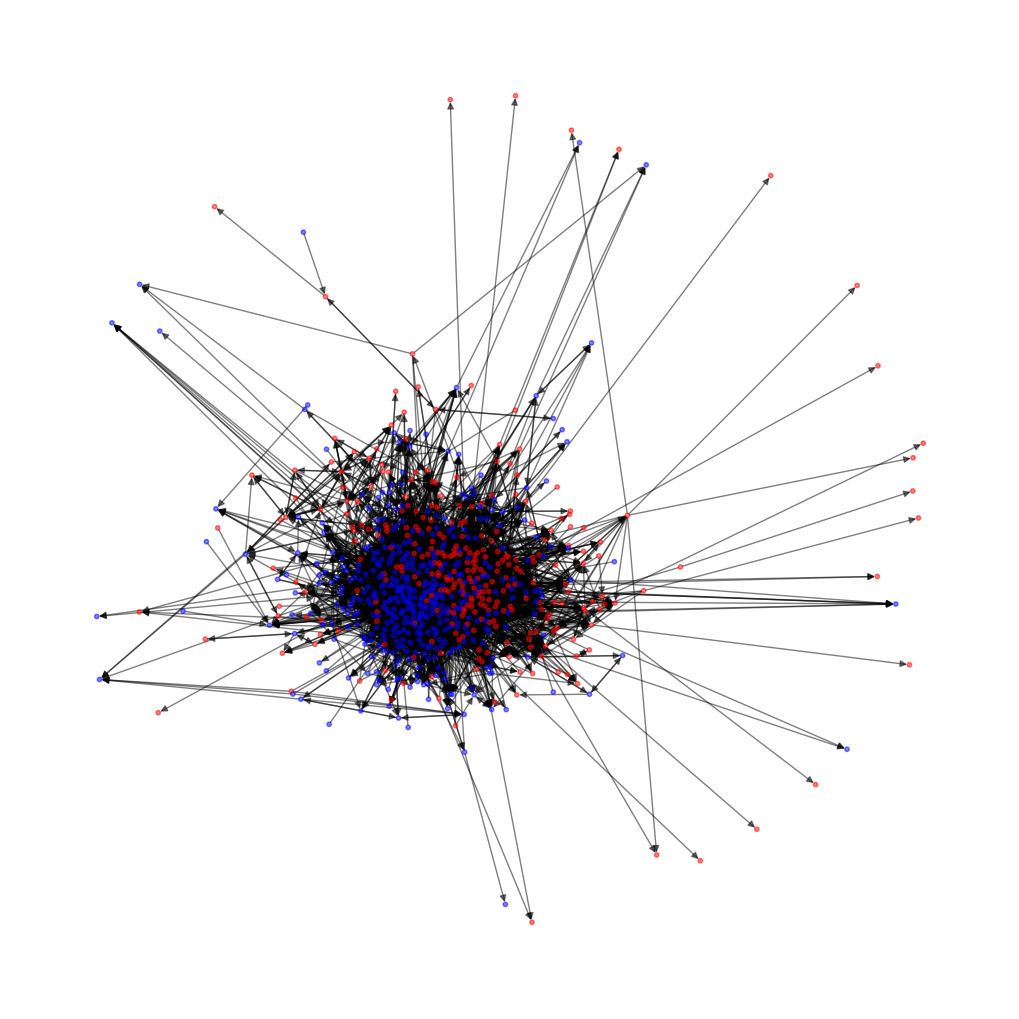

In [8]:
# extract largest connected component for directed graph
largest_cc = max(nx.weakly_connected_components(G), key=len)
G = G.subgraph(largest_cc).copy()

# edges and nodes
edges = G.edges()
nodes = G.nodes()

print("Number of nodes of largest component:", len(nodes))
print("Number of edges largest component:", len(edges))



# plot the graph with colors
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G, k=0.1)
nx.draw(G, pos, node_size=10, alpha=0.5, node_color=nx.get_node_attributes(G, 'color').values())
plt.show()


*Exercise 2:* Let's build a simple visualization of the network
>1. For the sake of the visualisation, let's convert our network to *undirected graph* (tip: There is a NetworkX command to help you).
>   * *Note*: Keep the directed graph, we will use it in couple of the following exercises
>2. Use the NetworkX command `nx.draw_kamada_kawai` to draw the resulting undirected network. (You can find [background on the algorithm here](https://en.wikipedia.org/wiki/Force-directed_graph_drawing).)  
>   * Node color should depend on the `coast` attribute (i.e. use different colors for west-coast and east-coast rappers).
>   * Set up your plot so that node-size depends on the node *degree*
>   * **Optional**: Set up you plot so that edge color depends on the `role` attribute. If an edge connects west-coast rappers, assign `color_a`, if the edge connects east-coast rappers assign `color_b`, in other cases assign `color_c` (i.e. when rapper from different coasts are connected). (Here, you get to decide on the colors.)

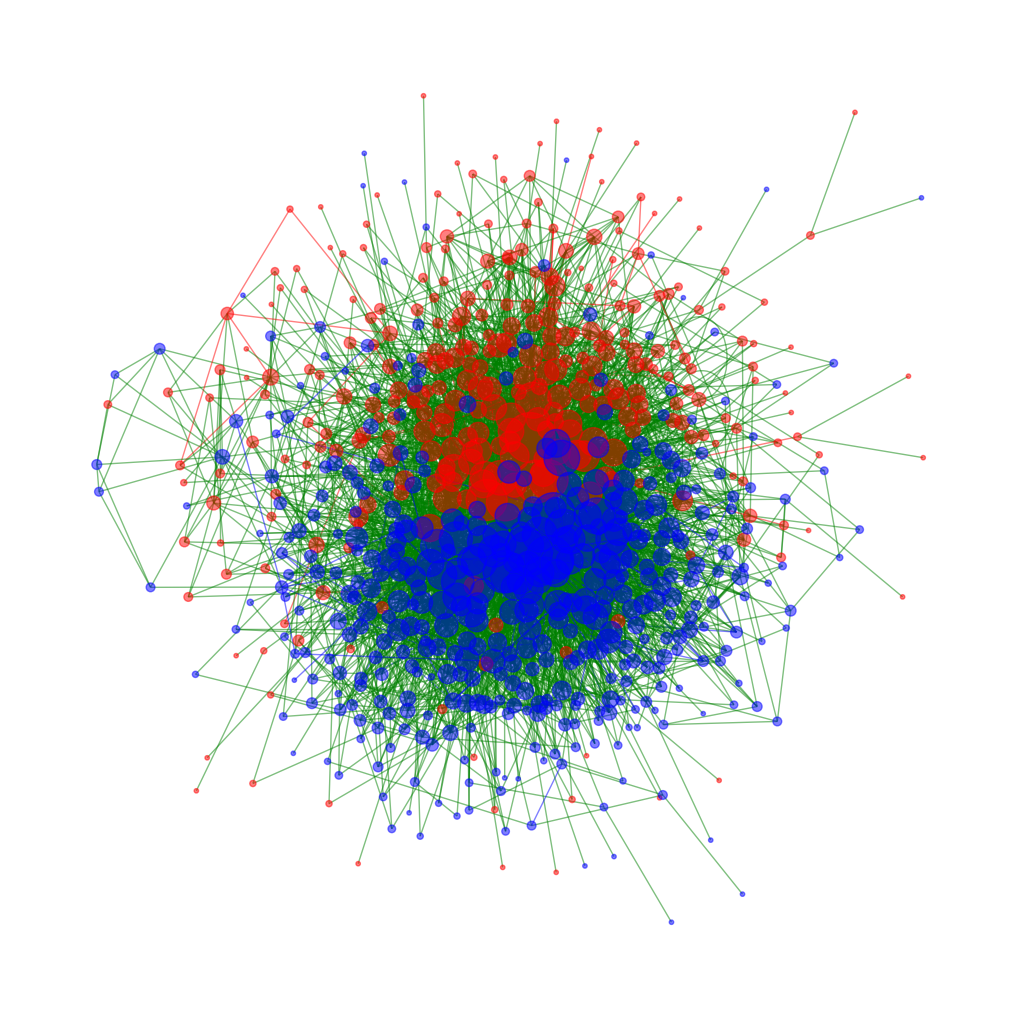

In [9]:
# convert directed graph to undirected graph
unG = G.to_undirected()

unG_edges = unG.edges()

for u,v in unG_edges:
    temp_u = u.replace("_", " ")
    temp_v = v.replace("_", " ")

    if temp_u in west_coast_rappers_v and temp_v in west_coast_rappers_v:
        unG[u][v]['color'] = 'red'
    elif temp_u in east_coast_rappers_v and temp_v in east_coast_rappers_v:
        unG[u][v]['color'] = 'blue'
    else:
        unG[u][v]['color'] = 'green'
# get node degrees to determine node size
node_degrees = unG.degree()
node_size = []
for key, value in node_degrees:
    node_size.append(value*10)

              
# draw kamada
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(unG)
nx.draw(unG, pos, alpha=0.5, node_color=nx.get_node_attributes(unG, 'color').values(), node_size=node_size, edge_color=nx.get_edge_attributes(unG, 'color').values())
plt.show()


*Exercise 3:* From the previous plot it is more difficult to observe any specific structure in the network. We can make even better visualisations with `ForceAtlas2` package:
>1. [Force Atlas 2 algorithm](https://github.com/bhargavchippada/forceatlas2) helps to determine the positions of the nodes (see what the result looks like below).
>2.You can install the  package typing `pip install fa2` in the terminal. The [github page](https://github.com/bhargavchippada/forceatlas2) explains how to use the package to get coordinates for each node.
>   * (**Hint**: if you install force atlas and Python can't find the package it might be because you computer tries to use the system's `pip`, therefore, try installing using the Anaconda pip explicitly ( on mac you would use `~/anaconda2/bin/pip install fa2`).
> * Visualize the network using the [Networkx draw function](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw.html#networkx.drawing.nx_pylab.draw), and node-coordinates from the force atlas algorithm. As in the previous Exercise:
>   * Node color should depend on the `coast` attribute (i.e. use different colors for west-coast and east-coast rappers)
>   * Node size should depend on the node *degree*
>   * **Optional**: edge color should depend on the `coast` attribute. If an edge connects west-coast rappers, assign `color_a`, if the edge connects east-coast rappers from  assign `color_b`, in other cases assign `color_c` (i.e. when connected rappers are from different coasts).
> * Play with the force atlas algorithm parameters to obtain a visualization you like. It may look similar to the one below (but not necessarily). 
> * Describe the structure you observe. Can you identify nodes with a privileged position in the network? Do you observe chains of connected nodes? Do you see any interesting group of nodes (can you guess who's involved)?





100%|██████████| 2000/2000 [00:15<00:00, 131.99it/s]


BarnesHut Approximation  took  3.35  seconds
Repulsion forces  took  9.73  seconds
Gravitational forces  took  0.14  seconds
Attraction forces  took  0.59  seconds
AdjustSpeedAndApplyForces step  took  0.64  seconds


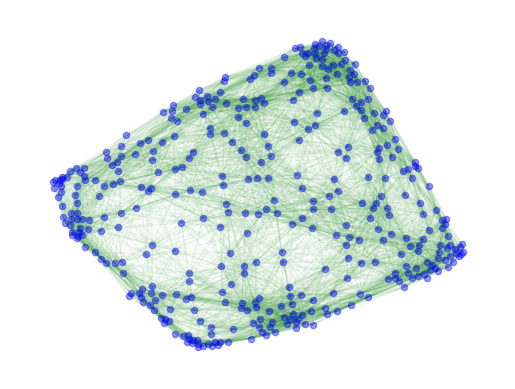

ModuleNotFoundError: No module named 'igraph'

In [90]:
import networkx as nx
from fa2 import ForceAtlas2
import matplotlib.pyplot as plt

Gfa2 = nx.random_geometric_graph(400, 0.2)

forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=2.0,
                        strongGravityMode=False,
                        gravity=1.0,

                        # Log
                        verbose=True)

positions = forceatlas2.forceatlas2_networkx_layout(Gfa2, pos=None, iterations=2000)
#nx.draw_networkx_nodes(G, positions, node_size=20, with_labels=False, node_color="blue", alpha=0.4)
nx.draw_networkx_nodes(Gfa2, positions, node_size=20, node_color="blue", alpha=0.4)

nx.draw_networkx_edges(Gfa2, positions, edge_color="green", alpha=0.05)
plt.axis('off')
plt.show()

# equivalently
import igraph
Gfa2 = igraph.Graph.TupleList(Gfa2.edges(), directed=False)
layout = forceatlas2.forceatlas2_igraph_layout(Gfa2, pos=None, iterations=2000)
igraph.plot(Gfa2, layout).show()

![Text]()

![](https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/files/Visualfa2Rappers.pngraw=true)

*Exercise 4*: We continue with a qualitative inspection of the rapper Wiki pages, that will help us to intepret our results. We investigate the reasons for links between rappers to exist on rapper Wiki.

>1. Consider the top 3 nodes with highest in-degree in the network. Open the corresponding Wiki pages.
>   * Consider the set of neighbours pointing towards the node found above. Look for them in the page. 
>   * What is the relation between the rappers you identified and his/her network neighbours? (e.g., do they come from the same coast, did they write songs together, etc.). You don't need to come up with a grand theory of rap music here, I just want you to think about how links come about.
>   * Repeat the exercise for the top 3 out-degree node. 
>   * Are there differences between reasons for out- and in-links? Again, there's no right answer here. I just want you to think about some of the reasons why links may occur between rappers.
>2. Are there any nodes with high out-degree and with few incoming connections? If yes, open the Wiki pages of such rappers and explain what happens?
>3. Are there any nodes with high in-degree and few outcoming connections? Again, open the Wiki pages of such rappers and explain what happens? 
>4. Do any nodes have particularly many links to rappers from the opposite coast? If yes, try and find out what is going on.

4.1 Mixed edges

In [11]:
# get top 3 nodes in terms of degree
top_3_nodes = sorted(node_degrees, key=lambda x: x[1], reverse=True)[:3]
top_1_node, top_2_node, top_3_node = top_3_nodes[0][0], top_3_nodes[1][0], top_3_nodes[2][0]

# get neighbors of top 3 nodes
top_1_neighbors = list(unG.neighbors(top_1_node))
top_2_neighbors = list(unG.neighbors(top_2_node))
top_3_neighbors = list(unG.neighbors(top_3_node))

print("Top 1 node:", top_1_node)
print("Neighbors total {}: {}".format(len(top_1_neighbors), top_1_neighbors))
print(50*"-")
print("Top 2 node:", top_2_node)
print("Neighbors total {}: {}".format(len(top_2_neighbors), top_2_neighbors))
print(50*"-")
print("Top 3 node:", top_3_node)
print("Neighbors total {}: {}".format(len(top_3_neighbors), top_3_neighbors))
print(50*"-")

Top 1 node: Snoop_Dogg
Neighbors total 130: ['The_Alchemist_(musician)', 'B-Legit', 'B-Real', 'Ant_Banks', 'Becky_G', 'Big_Dave_(rapper)', 'Big_Ed_(rapper)', 'Blueface', 'Blxst', 'Buddy_(rapper)', 'Chanel_West_Coast', 'Coolio', 'Crooked_I', 'The_D.O.C.', 'Demrick', 'Scoop_DeVille', 'Daz_Dillinger', 'Nate_Dogg', 'RBX', 'Dr._Dre', 'Warren_G', 'Kurupt', 'Tupac_Shakur', 'Xzibit', 'E-40', 'Benzino', 'DJ_Drama', 'Too_Short', 'Lil_Dicky', 'Kendrick_Lamar', 'Benny_the_Butcher', 'Kool_Moe_Dee', 'Ice_Cube', 'The_Notorious_B.I.G.', 'Jay-Z', 'The_Game_(rapper)', 'Domino_(rapper)', 'Drakeo_the_Ruler', 'MC_Eiht', 'Exile_(producer)', 'Joey_Fatts', 'JT_the_Bigga_Figga', 'Flying_Lotus', 'Mike_Free', 'Frost_(rapper)', 'O.T._Genasis', 'Hi-C_(rapper)', 'Hit-Boy', 'Hittman', 'Brotha_Lynch_Hung', 'Nipsey_Hussle', 'Jeff_Jericho', 'Kam_(rapper)', 'King_T', 'Kokane', 'Kossisko', 'Krondon', 'MC_Lars', 'Lecrae', 'Lil_Italy', 'CJ_Mac', 'Madlib', 'Mann_(rapper)', 'Terrace_Martin', 'Mistah_F.A.B.', 'Slim_the_Mobste

Out edges

In [66]:
# find top 3 nodes wrt out-degree
out_degrees = G.out_degree()
top_50_out_degree = sorted(out_degrees, key=lambda x: x[1], reverse=True)[:50]

top_1_node_out = top_50_out_degree[0][0]
top_2_node_out = top_50_out_degree[1][0]
top_3_node_out = top_50_out_degree[2][0]

# neighbors of top 3 nodes wrt out-degree
top_1_neighbors_out = list(unG.neighbors(top_1_node_out))
top_2_neighbors_out = list(unG.neighbors(top_2_node_out))
top_3_neighbors_out = list(unG.neighbors(top_3_node_out))

print("Top 1 node wrt out-degree:", top_1_node_out)
print("Neighbors total {}: {}".format(len(top_1_neighbors_out), top_1_neighbors_out))
print(50*"-")
print("Top 2 node wrt out-degree:", top_2_node_out)
print("Neighbors total {}: {}".format(len(top_2_neighbors_out), top_2_neighbors_out))
print(50*"-")
print("Top 3 node wrt out-degree:", top_3_node_out)
print("Neighbors total {}: {}".format(len(top_3_neighbors_out), top_3_neighbors_out))
print(50*"-")

Top 1 node wrt out-degree: Drag-On
Neighbors total 55: ['Kam_(rapper)', 'Swizz_Beatz', 'DMX', 'Eve_(rapper)', 'Jadakiss', 'Styles_P', 'Beanie_Sigel', 'Warren_G', 'Memphis_Bleek', 'Big_Pun', 'Fat_Joe', 'Remy_Ma', 'Petey_Pablo', 'Sheek_Louch', "Ol'_Dirty_Bastard", 'Jae_Millz', 'DJ_Kay_Slay', 'Dave_East', 'Crooked_I', 'Black_Thought', 'Conway_the_Machine', 'Ghostface_Killah', 'Inspectah_Deck', 'AZ_(rapper)', 'Fred_the_Godson', 'Joell_Ortiz', 'Cory_Gunz', "Shaquille_O'Neal", 'Redman_(rapper)', 'Big_Daddy_Kane', 'KRS-One', 'Cassidy_(rapper)', 'Freddie_Foxxx', 'Ice-T', 'Treach', 'Kool_G_Rap', "Lil'_Cease", 'J.R._Writer', 'Vado_(rapper)', 'Mistah_F.A.B.', 'Saigon_(rapper)', 'Melle_Mel', 'Grandmaster_Caz', 'Havoc_(musician)', 'E.D.I._Mean', 'Young_Noble', 'McGruff_(rapper)', 'Ras_Kass', 'Termanology', 'Uncle_Murda', 'Consequence_(rapper)', 'Bodega_Bamz', 'Sauce_Money', 'Neo_da_Matrix', 'Vinylz']
--------------------------------------------------
Top 2 node wrt out-degree: Black_Thought
Neighbo

4.2

In [91]:
# get the average incoming degree nodes
in_degrees = G.in_degree()


# get the bottom 5% of the nodes wrt to in-degree
in_degrees_sorted = sorted(in_degrees, key=lambda x: x[1], reverse=False)
in_degrees_sorted_last_5 = in_degrees_sorted[:int(len(in_degrees_sorted)*0.5)]

top_50_out_degree_nodes = [node for node, degree in top_50_out_degree]
for node, node_in_degree in in_degrees_sorted_last_5:
    for top_node, top_node_out_degree in top_50_out_degree:
        if node==top_node:
            print("Node {} is in top 50 out-degree {} and has in-degree {} which is in the bottom 5% of in degrees".format(node,top_node_out_degree, node_in_degree))


Node Aone_Beats is in top 50 out-degree 22 and has in-degree 0 which is in the bottom 5% of in degrees
Node Ty_Fyffe is in top 50 out-degree 30 and has in-degree 2 which is in the bottom 5% of in degrees
Node Cardiak is in top 50 out-degree 30 and has in-degree 3 which is in the bottom 5% of in degrees


4.3

In [55]:
# ToDo: Implement.

4.4

In [54]:
# ToDo: Implement.

# Part B:  Advanced tools 

> **Video lecture**: [*Network measures*.](https://www.dropbox.com/scl/fi/8dal16z6z2b7lqhwq2f1j/NetworkMeasures.mp4?rlkey=c0imv3tewun2ivoxgtqrrov31&dl=0) Link: https://www.dropbox.com/scl/fi/8dal16z6z2b7lqhwq2f1j/NetworkMeasures.mp4?rlkey=c0imv3tewun2ivoxgtqrrov31&dl=0

*Exercise 1:* Last time we visually analyzed (plotted) the degree distributions of our network. Now, let's analyze it using some of the tools from previous lectures. For this exercise we are going to look at the *directed* graph (rememeber, we asked you to keep one?).

>1. What are the average, median, mode, minimum and maximum value of the in-degree? And of the out-degree? How do you intepret the results?
>    * On top of that, calculate same statistics separately for the network that is spanned only by east-coast rappers and only by west-coast rappers. How do you interpret the results? 
>2. Let's also look at the *[exponent of the degree distribution](http://networksciencebook.com/chapter/4#degree-exponent)*
>    * To calculate it, you can install `powerlaw` package (I could not install in conda, so I used `pip install powerlaw`)
>    * Use `powerlaw.Fit(degree).alpha` for fitting
>    * Find the degree exponent for in-, out- and total- degree distribution. What does it say about our network?
>    * When analyzing the plots of in- and out- degree distribution last week, did you come up to the same conclusions?
>    * Some long time ago, couple of scientist have analyzed the network that is spanned by the whole Wikipedia (paper is called [Wikipedias: Collaborative web-based encyclopedias as complex networks](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.74.016115); to access this paper, use findit.dtu.dk or read the preprint on [arXiv](https://arxiv.org/abs/physics/0602149)). Do your findings correspond to the results described in Chapter **III.A**? If not, why? 
>3. Plot a scatter plot of the the in- versus out- degree for all rappers. Comment on the relation between the two.
>4. Plot a heatmap [(Hint here)](https://stackoverflow.com/questions/2369492/generate-a-heatmap-in-matplotlib-using-a-scatter-data-set) of the the in- versus out- degree for all rappers. What is the advantage of using a heatmap over the scatter plot?
>5. Why have we used directed graphs throughout this exercise? Could we have used an undirected graph instead?
>6. We have one more metric that we did not use. The node-attribute `content lenght`. There are two things we can investigate here.
>   * Firstly, we can verify that more text means more links. If that's true the length should correlate with out-degree.
>   * Secondly, and more interestingly, it could be that famous rappers have longer texts. And that means more in-links. 
>   * How should you test this? Well, here you are allowed to be **creative**. You may choose the method of your liking to study this question (e.g. look at it visually, test the correlation using spearman or pearson, fit a curve to the data, you decide). Once you've tested, let me know. Are both questions true? If yes, which phenomenon is stronger? Explain your results in your own words.

1.1

In [75]:
def get_degree_statistics(degrees):
    """
    Function that takes a list of degrees and returns a dictionary with the degree as key and the number of nodes with that degree as value.
    """
    avg_degree = np.mean([degree for node, degree in degrees])
    median_degree = np.median([degree for node, degree in degrees])
    mode_degree = max(set([degree for node, degree in degrees]), key=[degree for node, degree in degrees].count)
    max_degree = max([degree for node, degree in degrees])
    min_degree = min([degree for node, degree in degrees])

    return {"avg_degree": avg_degree, "median_degree": median_degree, "mode_degree": mode_degree, "max_degree": max_degree, "min_degree": min_degree}

In [76]:
G_in_degree_stats = get_degree_statistics(G.in_degree())
G_out_degree_stats = get_degree_statistics(G.out_degree())

print("Gcc in-degree stats:", G_in_degree_stats)
print("Gcc out-degree stats:", G_out_degree_stats)

West coast in-degree stats: {'avg_degree': 7.972565157750343, 'median_degree': 3.0, 'mode_degree': 0, 'max_degree': 128, 'min_degree': 0}
West coast out-degree stats: {'avg_degree': 7.972565157750343, 'median_degree': 6.0, 'mode_degree': 2, 'max_degree': 52, 'min_degree': 0}


In [77]:
west_G = G.subgraph(west_coast_rappers_v).copy()
west_G_in_degrees = west_G.in_degree()
west_G_out_degrees = west_G.out_degree()

west_G_in_degree_stats = get_degree_statistics(west_G_in_degrees)
west_G_out_degree_stats = get_degree_statistics(west_G_out_degrees)

print("West Gcc in-degree stats:", west_G_in_degree_stats)
print("West Gcc out-degree stats:", west_G_out_degree_stats)

West Gcc in-degree stats: {'avg_degree': 5.1923076923076925, 'median_degree': 2.0, 'mode_degree': 0, 'max_degree': 85, 'min_degree': 0}
West Gcc out-degree stats: {'avg_degree': 5.1923076923076925, 'median_degree': 4.0, 'mode_degree': 0, 'max_degree': 28, 'min_degree': 0}


In [78]:
east_G = G.subgraph(east_coast_rappers_v).copy()
east_G_in_degrees = east_G.in_degree()
east_G_out_degrees = east_G.out_degree()

east_G_in_degree_stats = get_degree_statistics(east_G_in_degrees)
east_G_out_degree_stats = get_degree_statistics(east_G_out_degrees)

print("East Gcc in-degree stats:", east_G_in_degree_stats)
print("East Gcc out-degree stats:", east_G_out_degree_stats)


East Gcc in-degree stats: {'avg_degree': 6.997619047619048, 'median_degree': 2.5, 'mode_degree': 0, 'max_degree': 95, 'min_degree': 0}
East Gcc out-degree stats: {'avg_degree': 6.997619047619048, 'median_degree': 5.0, 'mode_degree': 3, 'max_degree': 47, 'min_degree': 0}


1.2

In [79]:
import powerlaw as pl

In [87]:
degrees =  G.degree()
in_degree_fit = pl.Fit([degree for node, degree in in_degrees])
out_degree_fit = pl.Fit([degree for node, degree in out_degrees])
degree_fit = pl.Fit([degree for node, degree in degrees])

print("In-degree exponent:", in_degree_fit.power_law.alpha)
print("Out-degree exponent:", out_degree_fit.power_law.alpha)
print("Degree exponent:", degree_fit.power_law.alpha)


# pl.Fit([degree for node, degree in G.in_degree()]).power_law.plot_pdf(color='b',linestyle='--',label='In-degree')
# pl.Fit([degree for node, degree in G.out_degree()]).power_law.plot_pdf(color='r',linestyle='--',label='Out-degree')
# pl.Fit([degree for node, degree in G.degree()]).power_law.plot_pdf(color='g',linestyle='--',label='Degree')
# plt.xlabel("Degree")
# plt.ylabel("Frequency")
# plt.title("Powerlaw distribution of degrees")
# plt.legend()

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
In-degree exponent: 2.7257725820109466
Out-degree exponent: 11.99633114048648
Degree exponent: 3.5823879150998845


Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


Comments wrt degree exponents

In [88]:
# ToDo: Implement.

1.3

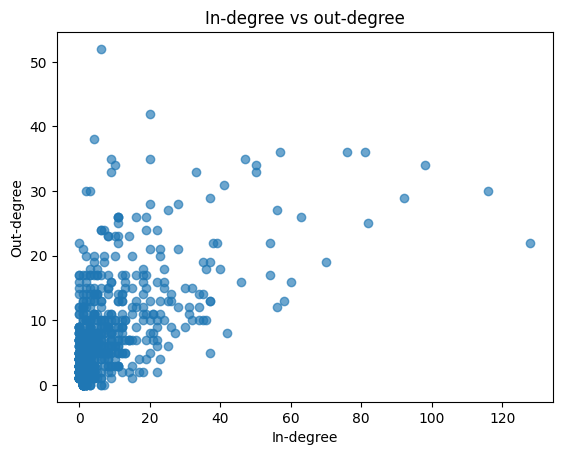

In [97]:
in_degrees_values = [degree for node, degree in in_degrees]
out_degrees_values = [degree for node, degree in out_degrees]
plt.scatter(in_degrees_values, out_degrees_values, alpha=0.65)
plt.xlabel("In-degree")
plt.ylabel("Out-degree")
plt.title("In-degree vs out-degree")
plt.show()

Comment

In [98]:
# ToDo: Implement.

1.4

C:\Users\staur\AppData\Local\Temp\ipykernel_16004\1333912295.py:1: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


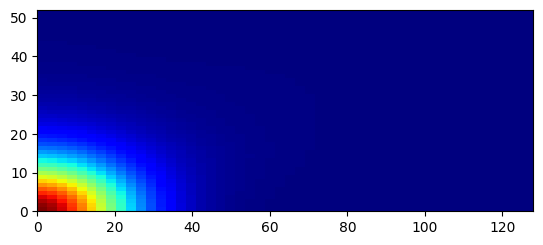

In [111]:
from scipy.ndimage.filters import gaussian_filter


heatmap, xedges, yedges = np.histogram2d(in_degrees_values, out_degrees_values, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
heatmap = gaussian_filter(heatmap, sigma=6)
plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower', cmap=plt.cm.jet)
plt.show()

Comment

In [112]:
# ToDo: Implement.

1.5

Comment

1.6

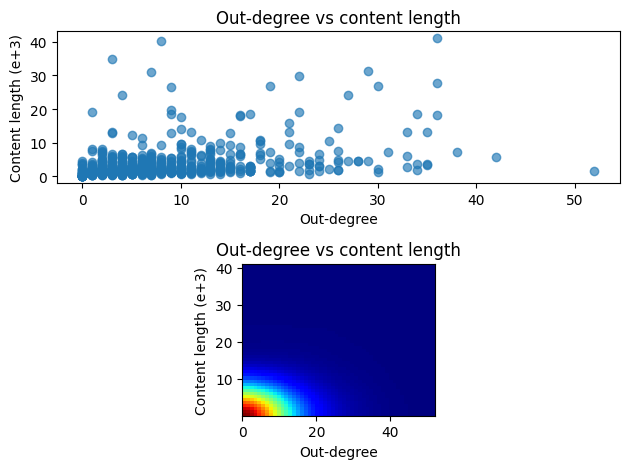

Pearson correlation coefficient between out-degree and content length: 0.37420284051114455


In [137]:
# Testing if high content length is correlated with high out-degree

content_length = nx.get_node_attributes(G, 'content_length')
content_length_values = [round(length/1000,2) for node, length in content_length.items()]

# create in the same figure one scatter plot and one heatmap of the content length of the nodes
# scatter plot
plt.subplot(2, 1, 1)
plt.scatter(out_degrees_values, content_length_values, alpha=0.65)
plt.xlabel("Out-degree")
plt.ylabel("Content length (e+3)")
plt.title("Out-degree vs content length")

# heatmap
plt.subplot(2, 1, 2)
heatmap, xedges, yedges = np.histogram2d(out_degrees_values, content_length_values, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
heatmap = gaussian_filter(heatmap, sigma=6)
plt.imshow(heatmap.T, extent=extent, origin='lower', cmap=plt.cm.jet)
plt.xlabel("Out-degree")
plt.ylabel("Content length (e+3)")
plt.title("Out-degree vs content length")
plt.tight_layout()
plt.show()



# Pearson correlation coefficient
from scipy.stats import pearsonr
print("Pearson correlation coefficient between out-degree and content length:", pearsonr(out_degrees_values, content_length_values)[0])


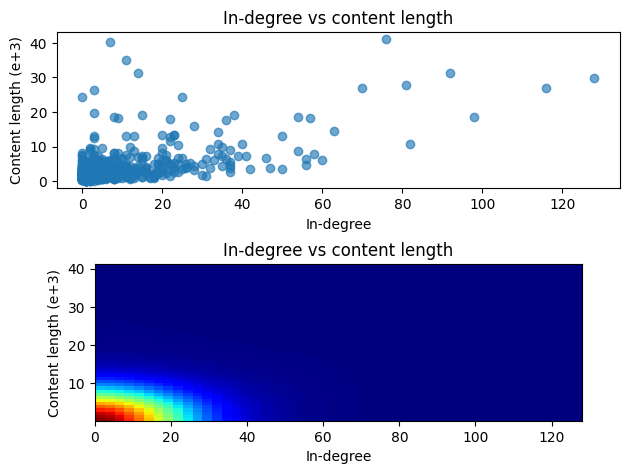

Pearson correlation coefficient between in-degree and content length: 0.5968389060739816


In [139]:
# Testing if high content length is correlated with high in-degree


# create in the same figure one scatter plot and one heatmap of the content length of the nodes
# scatter plot
plt.subplot(2, 1, 1)
plt.scatter(in_degrees_values, content_length_values, alpha=0.65)
plt.xlabel("In-degree")
plt.ylabel("Content length (e+3)")
plt.title("In-degree vs content length")

# heatmap
plt.subplot(2, 1, 2)
heatmap, xedges, yedges = np.histogram2d(in_degrees_values, content_length_values, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
heatmap = gaussian_filter(heatmap, sigma=6)
plt.imshow(heatmap.T, extent=extent, origin='lower', cmap=plt.cm.jet)
plt.xlabel("In-degree")
plt.ylabel("Content length (e+3)")
plt.title("In-degree vs content length")
plt.tight_layout()
plt.show()


print("Pearson correlation coefficient between in-degree and content length:", pearsonr(in_degrees_values, content_length_values)[0])



In-degrees seem to be more correlated with the context length. It makes sense if you consider that people would be more interested in reading  
information regarding their favourite/popular rappers thus their wiki pages are more rich in content.

*Exercise 2:* Centralities, assortativity and more.

Earlier, we found the most connected nodes (using degree centrality). Now let's dig in and try to understand more about the network using more advanced features. 

**Note**: Not all of the measures we'll be considering below are defined for directed graphs. Only use the undirected graph when explicitly stated in the exercise.
>1. Find the 5 most central rappers according to [degree centrality](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html). 
>2. Find the 5 most central rappers according to [betweenness centrality](https://networkx.org/documentation/stable/auto_examples/algorithms/plot_betweenness_centrality.html?highlight=betweenness%20centrality). 
>   * Repeat Exercise A2 or A3 (depending on which visualization method you liked the most). However, this time use betweenness centrality to define the size of the node.
>   * What role do you imagine rappers with high betweenness centrality play on  Wikipedia? 
>3. Find the 5 most central rappers according to eigenvector centrality. Calculate centrality corresponding to both in- and out-edges (see [NetworkX documentation](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.eigenvector_centrality.html#networkx.algorithms.centrality.eigenvector_centrality) for details). 
>   * Repeat Exercise A2 or A3 (depending on which visualization method you liked the most). However, this time use eigenvector centrality to define the size of the node.
>   * What role do you imagine rappers with high wikipedia graph eigenvector centrality play? 
>4. Is the undirected version of the graph assortative with respect to degree? (e.g. do high-degree rappers tend to link to other high-degree rappers, and low-degree rappers to other low-degree rappers?). Provide an interpretation of your answer.
>5. Is the undirected version of the graph assortative with respect do the `content length` nodal properties? (e.g. do rappers with long Wikipedia pages tend to link to other rappers with long Wiki pages, and *vice versa*?. Hint: Use [this function](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.assortativity.attribute_assortativity_coefficient.html#networkx.algorithms.assortativity.attribute_assortativity_coefficient). Provide an interpretation of your answer.
>6. Is the undirected version of the graph assortative with respect to Coast? (e.g. west-coast rappers tending to link to west-coast rappers, etc.). Provide an interpretation of your answer.
>7. What is the average shortest path length? Is it similar to the one of a random graph with the same number of nodes $N$  and probablity of connection $p$?
>   * Take a look at the *distribution* of shortest paths for the two networks (create a histogram for each network) to better compare and contrast. Explain what you see in your own words.

*Exercise 3*: Is the coast of a rapper important for the network structure? Let us explore if and how it shapes the network (use the undirected network). 
>1. Compute the average node centrality for west-coast and east-coast rappers respectively. You are free to choose your favourite centrality measure or compare different ones. Which coast do the more central rappers have?
>2. Create a randomized version of the full graph, where the association between nodes and coast is shuffled. Compute the average centrality of west-coast and east-coast rappers for this randomized graph. 
>   * **Hint**: To create this shuffling, simply give everyone a random coast assignment (but with the same number of west-coast and east-coast rappers as in the real data). The way I usually create random lables is by using either [`random.shuffle`](https://docs.python.org/3/library/random.html#random.shuffle) or [`numpy.random.permutation`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.permutation.html).
>3. Repeat the shuffling process above 1000 times (at least) and plot two histograms, each histogram with the 1000 corresponding average values of centrality obtained for west-coast and east-coast rappers in the shuffeled netowrks.
>4. Compare the value you have obtained in the real graph, with the randomized cases. Are rappers from one coast more central in the network (on average)?
>5. Think about your results, what could be possible explanations for what you observe?

The shuffling procedure you just carried out is often called a _permutation test_. It is a super powerful tool that we use all the time. Once you start to think about it, you can answer many questions of the type "Is [property] higher/lower in this network than one might have expected by chance?" with permutation tests.